#                       CAR ACCIDENT SEVERITY PREDICTION


# Introduction


The purpose of the capstone project is to help people to travel in safe roads around their neighborhood based on the weather conditions. It will help people reach their destinations or jobs safer in desired time. This project will help people to know of their road conditions based on the present weather and how safe it is to take the routes. It will help the people who mostly rely on road trip and car travels for their daily jobs or travels to nearby city which they are not familiar. The project will warn traveler to avoid the situation of getting in to accident in uncertain weather conditions. It will help them to avoid unnecessary risks and relaxed travel.

# Data Section

We will use the sample data set provided in the course. The data consists of Seattle city accident survey.
The data set contains the severity field which explains the fatality of an accident. The data set contains various fields that helps to predict the severity label such as weather conditions, condition of a road, severity desc,light conditions, as well as collision type. Most of the data are categorical types and the data engineering process is needed to normalize the data to build the model.


# Data Loading


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [101]:
df = pd.read_csv('Data-Collisions.csv')
df.head()
Feature = df[['SEVERITYCODE','X','Y','ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','WEATHER','ROADCOND','LIGHTCOND']].copy()
Feature.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,2,-122.323148,47.703140,Intersection,Angles,2,0,0,2,Overcast,Wet,Daylight
1,1,-122.347294,47.647172,Block,Sideswipe,2,0,0,2,Raining,Wet,Dark - Street Lights On
2,1,-122.334540,47.607871,Block,Parked Car,4,0,0,3,Overcast,Dry,Daylight
3,1,-122.334803,47.604803,Block,Other,3,0,0,3,Clear,Dry,Daylight
4,2,-122.306426,47.545739,Intersection,Angles,2,0,0,2,Raining,Wet,Daylight


**Drop missing values**

In [102]:
Feature.describe(include="all")
Feature = Feature.dropna()

**Convert categroical values to numeric**

In [103]:
Feature['ADDRTYPE'].replace(to_replace=['Alley','Block','Intersection'], value=[0,1,2],inplace=True)
Feature['COLLISIONTYPE'].replace(to_replace=['Angles','Cycles','Head On','Left Turn','Other','Parked Car','Pedestrian','Rear Ended','Right Turn','Sideswipe'], value=[0,1,2,3,4,5,6,7,8,9],inplace=True)
Feature['WEATHER'].replace(to_replace=['Blowing Sand/Dirt','Clear','Fog/Smog/Smoke','Other','Overcast','Partly Cloudy','Raining','Severe Crosswind','Sleet/Hail/Freezing Rain','Snowing','Unknown'], value=[0,1,2,3,4,5,6,7,8,9,10],inplace=True)
Feature['ROADCOND'].replace(to_replace=['Dry','Ice','Oil','Other','Sand/Mud/Dirt','Snow/Slush','Standing Water','Unknown','Wet'], value=[0,1,2,3,4,5,6,7,8],inplace=True)
Feature['LIGHTCOND'].replace(to_replace=['Dark - No Street Lights','Dark - Street Lights Off','Dark - Street Lights On','Dark - Unknown Lighting','Dawn','Daylight','Daylight','Other','Unknown','Dusk'], value=[0,1,2,3,4,5,6,7,8,9],inplace=True)
Feature.head()
Feature.shape

(184146, 12)

In [124]:
final_feature = Feature[:1000]
X = final_feature
X.shape

(1000, 12)

In [105]:
Y = final_feature['SEVERITYCODE'].values
Y[0:5]
Y.shape

(1000,)

**NORMALISE DATA**

In [106]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]


array([[ 1.52389604,  0.23462932,  1.44727944,  1.39016234, -1.61060815,
        -0.41662471, -0.16381273, -0.19044535,  0.01555151,  0.5092297 ,
         1.80868018,  0.37073993],
       [-0.65621274, -0.56521103,  0.4669422 , -0.71934045,  1.6808254 ,
        -0.41662471, -0.16381273, -0.19044535,  0.01555151,  1.26927403,
         1.80868018, -1.66071172],
       [-0.65621274, -0.14272093, -0.22145849, -0.71934045,  0.21796604,
         1.10668318, -0.16381273, -0.19044535,  1.74349728,  0.5092297 ,
        -0.57783498,  0.37073993],
       [-0.65621274, -0.15144282, -0.27520729, -0.71934045, -0.1477488 ,
         0.34502924, -0.16381273, -0.19044535,  1.74349728, -0.63083679,
        -0.57783498,  0.37073993],
       [ 1.52389604,  0.78855403, -1.30976732,  1.39016234, -1.61060815,
        -0.41662471, -0.16381273, -0.19044535,  0.01555151,  1.26927403,
         1.80868018,  0.37073993]])

# METHODOLOGY

Classfication alogrithms is being used to predict the models and based on the jaccard and f1 score best model could be predicted

**K-NEAREST NEIGHBOURS**

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (700, 12) (700,)
Test set: (300, 12) (300,)


In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 12
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==Y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.98666667, 0.98333333, 0.98      , 0.97      , 0.96666667,
       0.97      , 0.97333333, 0.97      , 0.97333333, 0.96333333,
       0.97666667])

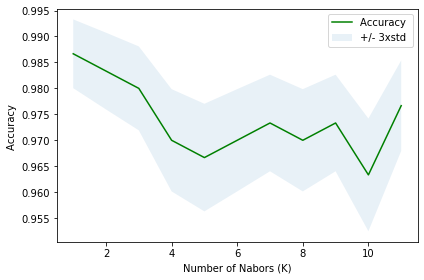

The best accuracy was with 0.9866666666666667 with k= 1
Jaccard 0.9766666666666667
F score 0.9768583296603492


D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [113]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 


from sklearn.metrics import jaccard__score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
jc1=jaccard_score(Y_test, yhat)
fs1=f1_score(Y_test, yhat, average='weighted')
print( "Jaccard",jc1) 
print( "F score",fs1) 

**DECISION TREE**

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
decTree = DecisionTreeClassifier(criterion="entropy")
decTree
decTree.fit(X_train,y_train)
predTree = decTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])



print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

jc2=jaccard_score(y_test, predTree)
fs2=f1_score(y_test, predTree, average='weighted')
print( "Jaccard",jc1) 
print( "F score",fs1) 

Train set: (700, 12) (700,)
Test set: (300, 12) (300,)
[2 1 2 1 1]
[2 1 2 1 1]
DecisionTrees's Accuracy:  1.0
Jaccard 0.9766666666666667
F score 0.9768583296603492


**SUPPORT VECTOR MACHINE**

In [118]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
from sklearn import svm
clf = svm.SVC(kernel='sigmoid',gamma='auto')
clf.fit(X_train, y_train) 
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 1, 2, 1, 1], dtype=int64)

In [120]:
print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat))

Avg F1-score: 1.0000
Jaccard score: 1.0000


**LOGISTIC REGERESSION**

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR
yhat = LR.predict(X_test)
yhat

yhat_prob = LR.predict_proba(X_test)
yhat_prob
from sklearn.metrics import jaccard_score
print(jaccard_score(y_test, yhat))

from sklearn.metrics import log_loss
print(log_loss(y_test, yhat_prob))

1.0
0.2068360810878231
